# <span style="color:mediumvioletred"> **EDA Inicial**</span>
### **Proyecto de Ciencia de Datos**
- Aissa Berenice Gonzalez Fosado
- Clara Paola Aguilar Casillas
- Daniela de la Torre Gallo


<img src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal-Gris.png"  width="300">

En esta etapa exploraremos el dataset original para comprender su estructura, tipos de variables, presencia de valores nulos, y distribución general de las características principales. Este análisis es fundamental para guiar las decisiones de limpieza y transformación posteriores.


### **Estructura del Dataset**

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/raw/apartments.csv", sep=";", encoding='cp1252')
print("Información del Dataset:")
print(df.info())
df.head(3)

Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-nu

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410


Tuvimos que modificar el encoding del archivo, la fuente original no era compatible con UTF-8 y estaba separada por punto y coma así que utilizamos separación y encoding distinto `sep=";"`, `encoding='cp1252'`

El conjunto de datos original contiene 10,000 registros y 22 columnas, con una mezcla de 8 variables numéricas y 14 categóricas o de texto.

El dataset incluye información sobre anuncios de apartamentos, con columnas que describen características como precio, tamaño (square_feet), número de habitaciones y baños, así como metadatos de ubicación, descripción textual y fuente del anuncio.

No todos los tipos de datos están bien definidos, las variables numéricas son price, square_feet, bedrooms y bathrooms se encuentran correctamente en formato numérico (int64 o float64), mientras que las variables categóricas (cityname, state, pets_allowed, etc.) están en formato object, pero pueden haber algunas modificaciones.

### **Valores nulos y duplicados**

In [66]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

pets_allowed    4163
amenities       3549
address         3327
cityname          77
state             77
bathrooms         34
latitude          10
longitude         10
bedrooms           7
dtype: int64

In [67]:
duplicates = df.duplicated().sum()
print(f"Registros duplicados: {duplicates}")

if duplicates > 0:
    display(df[df.duplicated()].head())

Registros duplicados: 0


No tuvimos duplicados de los postings.
Las columnas `pets_allowed`, `amenities` y `address` presentan una proporción alta de valores nulos, lo que sugiere que muchos anuncios no especifican estas características.
En contraste, las variables de ubicación (`latitude`, `longitude`, `cityname`, `state`) tienen pocos faltantes, lo cual facilita su imputación después en wrangling. Se detectaron valores faltantes en 9 columnas. Las más afectadas se muestran en la gráfica.

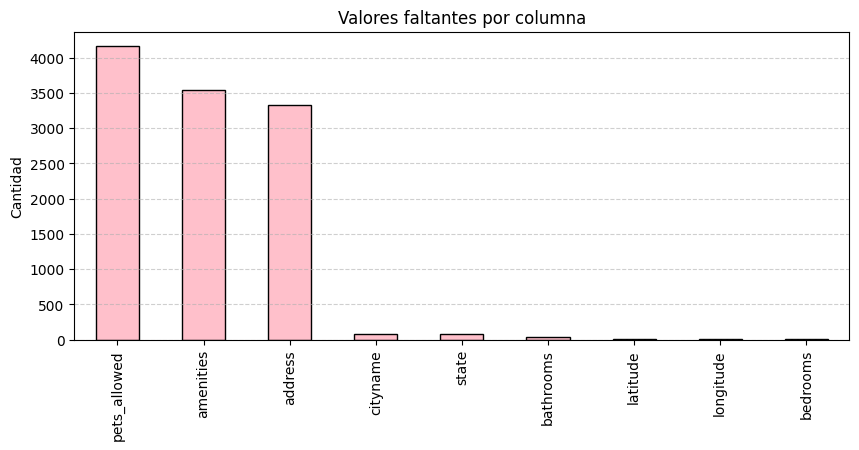

In [68]:
plt.figure(figsize=(10,4))
missing[missing > 0].plot(kind='bar', color='pink', edgecolor='black')
plt.title("Valores faltantes por columna")
plt.ylabel("Cantidad")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### **Estadísticas descriptivas y variabilidad**

In [69]:
cat_cols = df.select_dtypes(exclude=np.number).columns
df[cat_cols].nunique().sort_values(ascending=False)

body             9961
title            9350
address          6658
amenities        2254
price_display    1726
cityname         1574
state              51
source             12
category            3
has_photo           3
pets_allowed        3
price_type          3
currency            1
fee                 1
dtype: int64

De las variables categóricas:

El campo `category` muestra una baja variabilidad, con solo 3 valores únicos, predominando la categoría "housing/rent/apartment" en el 99.9% de los registros.

El campo `title` tiene 9,350 valores únicos, lo que indica una gran diversidad en los títulos de los anuncios. El título más repetido es “Apartment in great location” (aparece 40 veces).

La columna `body` contiene descripciones extensas de texto, con 9,961 valores únicos, lo cual confirma que cada anuncio es prácticamente único.

En `amenities` existen 2,254 combinaciones únicas, siendo “Parking” la amenidad más común (229 apariciones).

`pets_allowed` presenta muchos valores nulos, y en los casos presentes muestra categorías limitadas (por ejemplo, "Yes", "No" o similares).

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,5.623396e+09,7.021025e+07,5.508654e+09,5.509248e+09,5.668610e+09,5.668626e+09,5.668663e+09
bathrooms,9966.0,1.380544e+00,6.154099e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,8.500000e+00
bedrooms,9993.0,1.744021e+00,9.423539e-01,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,9.000000e+00
price,10000.0,1.486277e+03,1.076508e+03,2.000000e+02,9.490000e+02,1.270000e+03,1.695000e+03,5.250000e+04
square_feet,10000.0,9.458105e+02,6.557557e+02,1.010000e+02,6.490000e+02,8.020000e+02,1.100000e+03,4.000000e+04
latitude,9990.0,3.769516e+01,5.495851e+00,2.131550e+01,3.367985e+01,3.880980e+01,4.134980e+01,6.159400e+01
longitude,9990.0,-9.465225e+01,1.575980e+01,-1.580221e+02,-1.013017e+02,-9.365160e+01,-8.220998e+01,-7.019160e+01
time,10000.0,1.574891e+09,3.762395e+06,1.568744e+09,1.568781e+09,1.577358e+09,1.577359e+09,1.577362e+09


De las variables numéricas:

Precio (`price`) Tiene un rango de valores amplio, con distribución sesgada a la derecha (presencia de precios altos), el conteo total indica no hay nulos, por lo tanto es una variable completamente poblada.

Baños (`bathrooms`) Rango: de 1 a 8.5 baños. Promedio: 1.38, desviación estándar: 0.61. Esto sugiere que la mayoría de las propiedades tienen entre 1 y 2 baños.

Habitaciones (`bedrooms`) Rango: de 0 a 9 habitaciones. Promedio: 1.74, desviación estándar: 0.94. Algunos valores extremos (0 y 9) podrían considerarse outliers.

Superficie (`square_feet`) Rango: de 101 a 40,000 pies cuadrados. Promedio: 946 sqft, desviación estándar: 655 sqft. Esto muestra una alta variabilidad en el tamaño de los departamentos, con posibles valores atípicos en los extremos.

### **Distrubuciones**

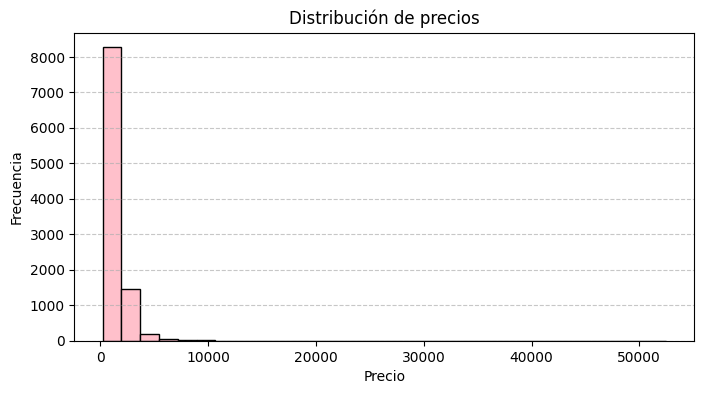

In [71]:
plt.figure(figsize=(8,4))
plt.hist(df['price'], bins=30, color='pink', edgecolor='black')
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

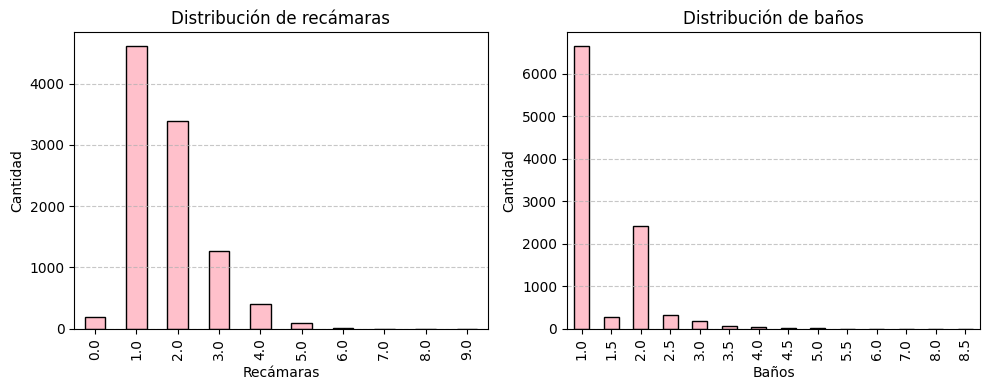

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

df['bedrooms'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='pink', edgecolor='black')
axes[0].set_title('Distribución de recámaras')
axes[0].set_xlabel('Recámaras')
axes[0].set_ylabel('Cantidad')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

df['bathrooms'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='pink', edgecolor='black')
axes[1].set_title('Distribución de baños')
axes[1].set_xlabel('Baños')
axes[1].set_ylabel('Cantidad')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

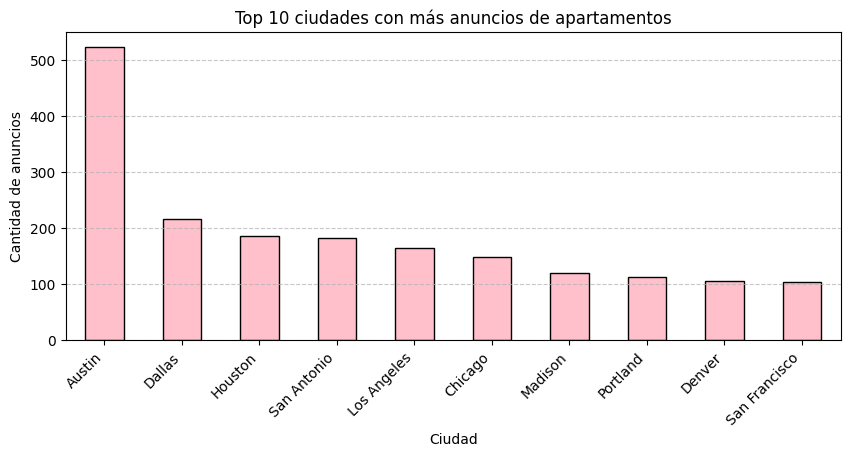

In [73]:
plt.figure(figsize=(10,4))
df['cityname'].value_counts().head(10).plot(kind='bar', color='pink', edgecolor='black')
plt.title('Top 10 ciudades con más anuncios de apartamentos')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de anuncios')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

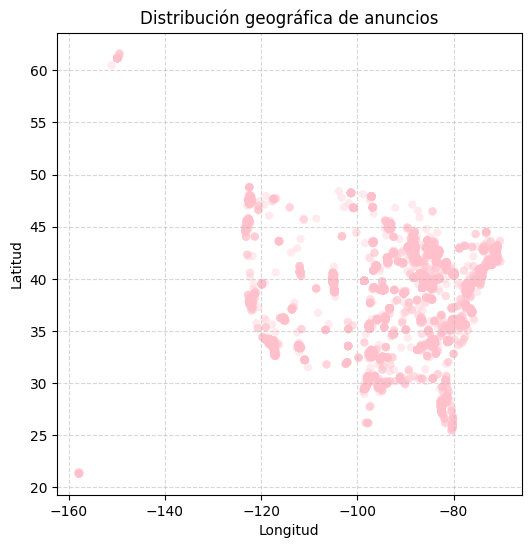

In [74]:
plt.figure(figsize=(6,6))
plt.scatter(df['longitude'], df['latitude'], alpha=0.3, color='pink', edgecolor='none')
plt.title('Distribución geográfica de anuncios')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Las Distribuciones iniciales mostradas nos dan una idea de las mayores tendencias de los datos, sin embargo, se debería comparar con los datos limpios de outliers y sin NaN, para darnos una idea más clara de las distribuciones.

### **Rangos y Outliers**

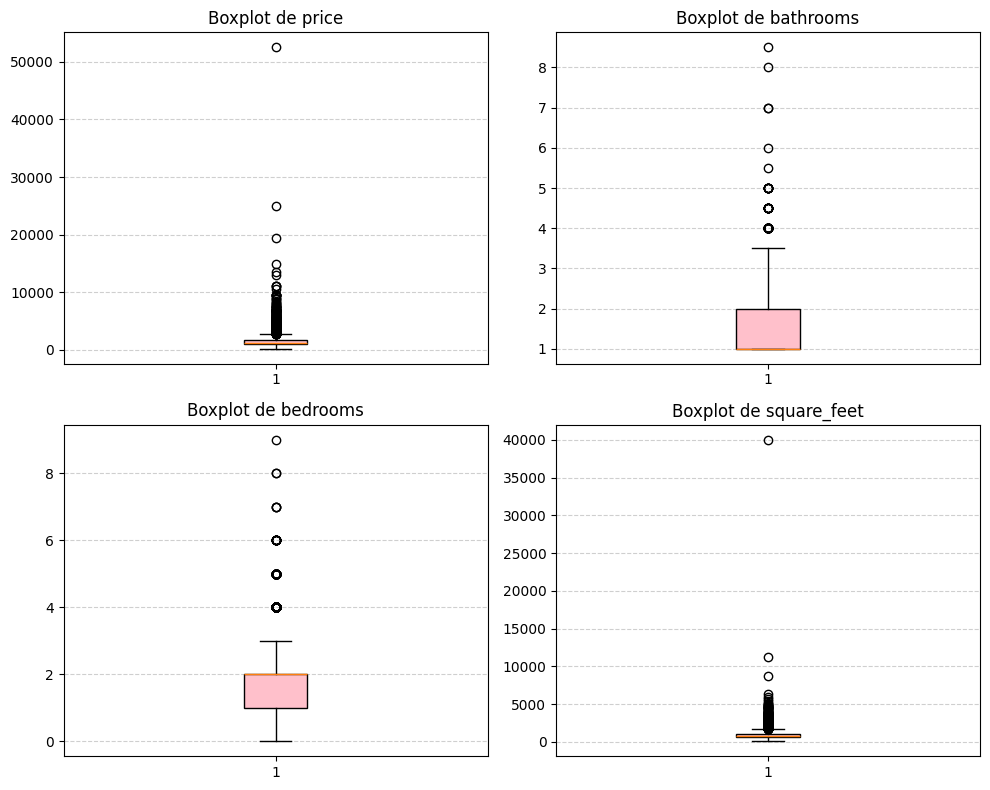

In [75]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))
axes = axes.ravel()
cols = ['price', 'bathrooms', 'bedrooms', 'square_feet']

for i, col in enumerate(cols):
    axes[i].boxplot(df[col].dropna(), patch_artist=True, boxprops=dict(facecolor='pink'))
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [76]:
print("Precio mínimo:", df['price'].min())
print("Precio máximo:", df['price'].max())
print("Área mínima:", df['square_feet'].min())
print("Área máxima:", df['square_feet'].max())

Precio mínimo: 200
Precio máximo: 52500
Área mínima: 101
Área máxima: 40000


Analizamos los outliers de los valores numéricos del dataset, en el que pudimos ver gracias a las gráficas de Boxplot, que contamos con bastantes outliers y problemas de variabilidad de datos, por lo que tendra que ser revisado en el Data Wrangling.

###  **Mapa de correlacion**

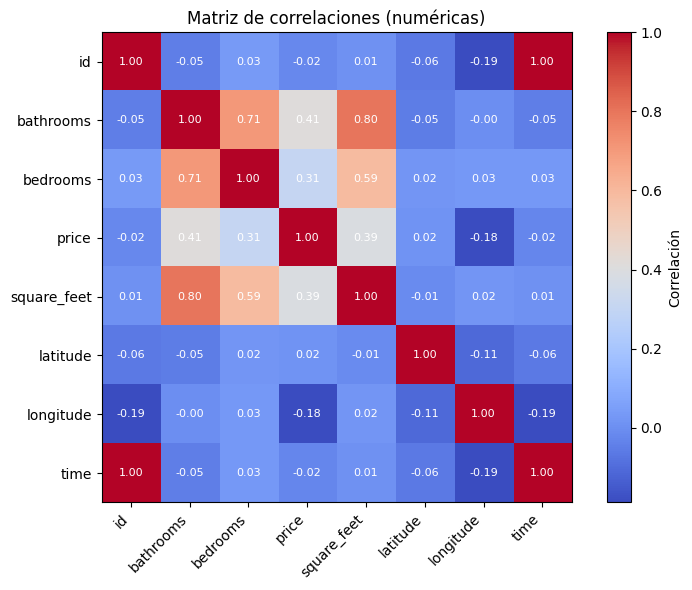

In [77]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
im = plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlación')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Matriz de correlaciones (numéricas)')

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha="center", va="center", color="white", fontsize=8)

plt.tight_layout()
plt.show()


Las variables que aportan más relación con el precio son `bathrooms`, `square_feet` y `bedrooms`. `id` y `time` son identificadores, deben descartarse. Las coordenadas no muestran correlaciones lineales útiles, pero podrían servir si se agrupan por zonas o se extraen features espaciales (distancias, regiones). En general, la estructura del inmueble tiene más impacto en el precio que la ubicación bruta o el identificador.

## **Conclusiones del EDA inicial**

* El dataset es completo y bien estructurado, pero contiene valores nulos significativos que tendremos que imputar según las necesidades.
* No encontramos Duplicados, así que no habrá necesidad de ese paso.
* Se identifican posibles outliers en price, square_feet, bedrooms y bathrooms, que manejaremos en Wrangling.
* Existen columnas con baja variabilidad (currency, fee, category) que probablemente no aporten valor predictivo.
* Las variables geográficas y numéricas son coherentes y útiles para análisis espacial o modelado.